# test-2

Rectangle 1:99

12 dic 2024

   cycle   cells    DoFs     ex POINT err               L2               H1  \
0      0    9800   10000 1.0463278500e-07 2.4242196000e-07 6.4873647166e-05   
1      1    9830   10040 5.2341076000e-08 2.4330753600e-07 6.4982950177e-05   
2      2    9953   10191 2.4828412000e-08 2.4379941800e-07 6.5043422457e-05   
3      3   10484   10788 1.0035952000e-08 2.4405770000e-07 6.5075096605e-05   
4      4   13232   13760 3.2659710000e-09 2.4416692200e-07 6.5088427450e-05   
5      5   21356   22286 7.2140700000e-10 2.4421073900e-07 6.5093783996e-05   
6      6   43643   45337 4.1447300000e-10 2.4423410500e-07 6.5096927353e-05   
7      7   94163   97601 7.9888200000e-10 2.4424964400e-07 6.5099467771e-05   
8      8  199193  205083 9.9283200000e-10 2.4425707600e-07 6.5100856867e-05   

      std FLUX err          est err   Cons. FLUX err  
0 2.3365961753e-05 8.6711997000e-08 4.1000000000e-05  
1 2.8544883814e-05 4.5377236000e-08 4.1000000000e-05  
2 3.2458808572e-05 2.2711345000e-08 4.000000

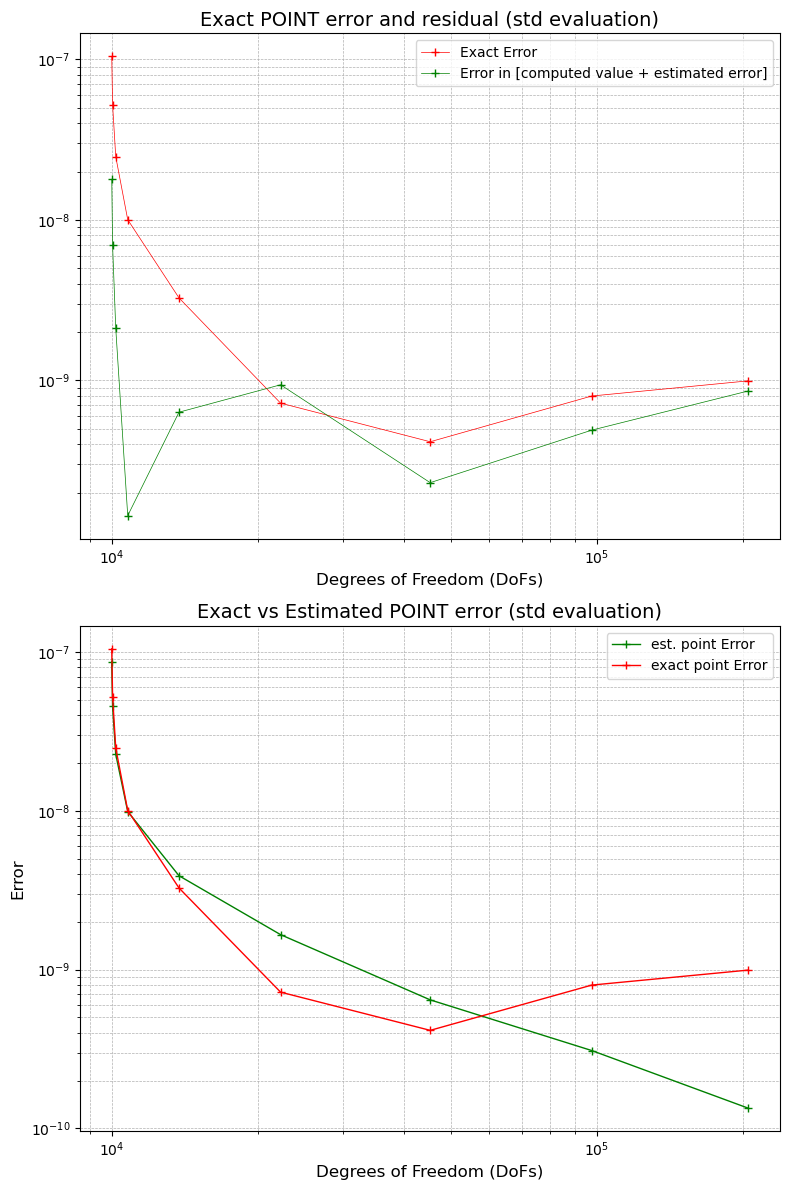

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os


# Load the data from the CSV file
file_name = "./results/convergence_results.csv"
data = pd.read_csv(file_name)

# Compute 1/N (1/DoFs)
#data['1/N'] = 1 / data['DoFs']
pd.options.display.float_format = '{:.10e}'.format  # 10 digits of precision
print(data)

# Create the figure
plt.figure(figsize=(8, 12))  # Adjust the figure size for two plots

# Plot 1: Original log-log plot
plt.subplot(2, 1, 1)  # First subplot (top)
plt.loglog(data['DoFs'], data['ex POINT err'], "r-+", linewidth=0.5, label='Exact Error')
plt.loglog(data['DoFs'], abs(data['ex POINT err']-data["est err"]),"g-+", linewidth=0.5, label='Error in [computed value + estimated error]')
plt.xlabel('Degrees of Freedom (DoFs)', fontsize=12)
plt.title('Exact POINT error and residual (std evaluation)', fontsize=14)
plt.legend()
plt.grid(True, which="both", linestyle='--', linewidth=0.5)

plt.subplot(2, 1, 2)  # Second subplot (bottom)
plt.loglog(data['DoFs'], data['est err'],"g-+", linewidth=1.0, label='est. point Error')
plt.loglog(data['DoFs'], data['ex POINT err'],"r-+", linewidth=1.0, label='exact point Error')


plt.xlabel('Degrees of Freedom (DoFs)', fontsize=12)
plt.ylabel('Error', fontsize=12)
plt.title('Exact vs Estimated POINT error (std evaluation)', fontsize=14)
plt.legend()
plt.grid(True, which="both", linestyle='--', linewidth=0.5)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()
